In [14]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as py

In [228]:
X, y = make_classification(n_samples=100, n_features=2, n_informative=1, n_redundant= 0, 
                           n_classes= 2, n_clusters_per_class= 1,hypercube = False, random_state= 41, class_sep=10)

X

array([[ 0.19924745, -0.11697552],
       [-0.24882029, -0.73115232],
       [-0.3544904 , -0.7081059 ],
       [-1.59086506, -2.01199214],
       [-0.20083951,  1.63493163],
       [-0.83241122,  0.15599044],
       [-1.79207014,  1.07782053],
       [ 0.0856607 ,  0.80626713],
       [-0.55865299,  0.74859527],
       [-1.95974262,  0.75152794],
       [-1.77828947, -0.90114581],
       [-1.77985853, -0.1815243 ],
       [-0.02194151, -2.98092432],
       [ 0.80563431,  1.20500136],
       [-1.82701214,  0.78302407],
       [ 0.38730728,  0.42968688],
       [-0.14108668, -0.73229726],
       [-1.87955941, -0.83930476],
       [-0.18232911,  0.83727062],
       [-1.77059533, -0.10255323],
       [-2.27658028,  0.65867001],
       [-2.06519502,  0.92649819],
       [-1.31690551,  0.10216193],
       [ 1.61043259,  0.46886454],
       [-1.21650394,  0.45432938],
       [ 0.6139723 ,  1.8613386 ],
       [-1.78760957, -0.79255991],
       [-1.04149161, -1.0004391 ],
       [-2.40067584,

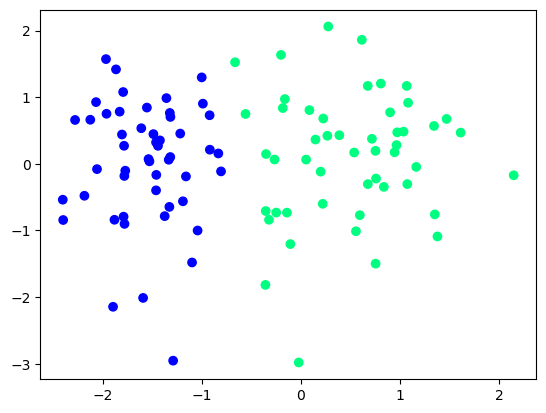

In [230]:
py.scatter(X[:, 0], X[:, 1], c=y, cmap='winter')

In [232]:
from sklearn.linear_model import LogisticRegression

In [234]:
reg = LogisticRegression()

In [236]:
reg.fit(X, y)

LogisticRegression()

In [290]:
m = -(reg.coef_[0][0] / reg.coef_[0][1])
b = -(reg.intercept_ / reg.coef_[0][1])

In [292]:
m, b

(-126.24706352310277, array([-81.16386951]))

In [294]:
x_intercept = np.linspace(-3, 3, 10)
y_intercept = m*x_intercept + b

In [296]:
x_intercept

array([-3.        , -2.33333333, -1.66666667, -1.        , -0.33333333,
        0.33333333,  1.        ,  1.66666667,  2.33333333,  3.        ])

In [298]:
y_intercept

array([ 297.57732106,  213.41261205,  129.24790303,   45.08319401,
        -39.081515  , -123.24622402, -207.41093303, -291.57564205,
       -375.74035106, -459.90506008])

(-3.0, 2.0)

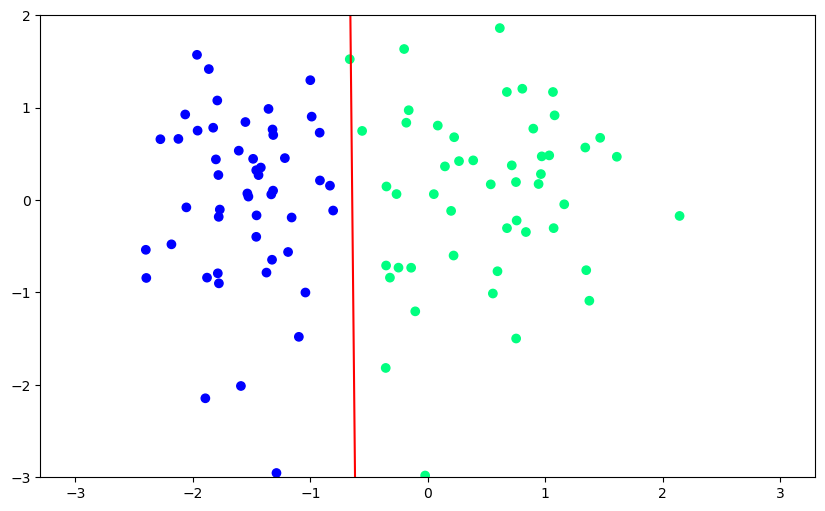

In [304]:
py.figure(figsize=(10, 6))
py.scatter(X[:, 0], X[:, 1], c=y, cmap = 'winter')
py.plot(x_intercept, y_intercept, color="red", label="sklearn-reg")
py.ylim(-3, 2)

<h1>Perceptron</h1>

In [417]:
def step(num):
    return 1 if num > 0 else 0

In [419]:
def perceptron_step(X, Y, epoch=100, lr = 0.1):
    X = np.insert(X, 0, 1, axis=1)
    W = np.ones(X.shape[1])

    for i in range(epoch):
        j = np.random.randint(0, X.shape[0])
        # with step function:
        y_hat = step(np.dot(W, X[j]))

        W = W + lr*(Y[j] - y_hat)*X[j]

    print(W)
    return W[0], W[1:]

In [421]:
def sigmoid(num):
    return 1 / (1 + np.exp(-num))

In [423]:
def perceptron(X, Y, epoch=100, lr = 0.1):
    X = np.insert(X, 0, 1, axis=1)
    W = np.ones(X.shape[1])

    for i in range(epoch):
        j = np.random.randint(0, X.shape[0])
        # using sigmoid: optimized
        y_hat = sigmoid(np.dot(W, X[j]))
        
        W = W + lr*(Y[j] - y_hat)*X[j]

    print(W)
    return W[0], W[1:]

In [425]:
intercept, coef = perceptron_step(X, y, epoch=1000)
intercept1, coef1 = perceptron(X, y, epoch=1000)

[0.9        1.36736157 0.09950073]
[2.70013264 4.41815765 0.17082319]


In [427]:
intercept, coef

(0.9, array([1.36736157, 0.09950073]))

In [429]:
m = -coef[0]/coef[1]
b = -intercept/coef[1]

m1 = -coef1[0]/coef1[1]
b1 = -intercept1/coef1[1]

m, b

(-13.742225936650522, -9.045159374642347)

In [431]:
y_input = m*x_intercept + b
y_input1 = m1*x_intercept + b1

(-3.0, 2.0)

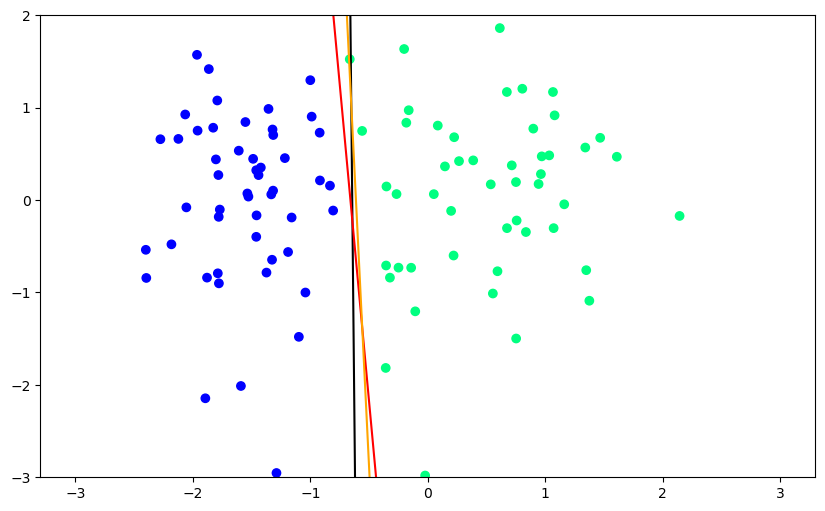

In [433]:
py.figure(figsize=(10, 6))
py.scatter(X[:, 0], X[:, 1], c=y, cmap = 'winter')
py.plot(x_intercept, y_intercept, color="black", label="sklearn-reg")
py.plot(x_intercept, y_input, color="red", label="sklearn-reg")
py.plot(x_intercept, y_input1, color="orange", label="sklearn-reg")
py.ylim(-3, 2)